
![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)





An Ecommerce company sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They need our help to figure it out! 

**When working on the assignment there could be multiple models to explore data or iplement specific analysis. Choose that you retain more appropriate but always justify every choice you make (e.g., why you choose some variables), comment your code, describe the plots and results you obtain.**

Feel free to add many cells as you need to write your code, comments, answers, etc.



### Import libraries

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#### Code to avoid cell auto-scrolling

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#### Read the dataset provided by the company: 
They provide us with a csv file `Ecommerce_Customers.csv`

The dataset contains information about the customers:
    - Email: email of the customer.
    - Address: address of the customer.
    - Avatar: color of the avatar.
    - Avg. Session Length: Average session of in-store style advice sessions.
    - Time on App: Average time spent on App in minutes
    - Time on Website: Average time spent on Website in minutes
    - Length of Membership: How many years the customer has been a member.

In [6]:
customers = pd.read_csv('Ecommerce_Customers.csv')
customers.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [7]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Exploatory Data analysis

Perform some exploratory data analysis:
    - Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, remove thos variables.
    - Check for missing values
    - check the distribution of the target variable to see if there is some outlier
    - check which are the variables with highest correlation with the target variable
    - check for multi-colinearity

**Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, explain why you think they are useless and remove them.**



Write your answer here:






first, we will drop the irrelevant variables (columns in this case)

In [9]:
new_customers_df= customers.drop(columns=["Email", "Address", "Avatar"])



#### Check Missing values

In [12]:
print(new_customers_df.isnull().sum())



Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64


In [11]:
print(customers.isnull().sum())

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64


everything looks cool, todo bien 

#### Check disttribution of the target variable

we will use matplotlib

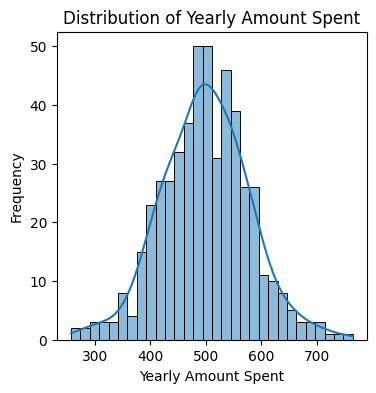

In [14]:
plt.figure(figsize=(4, 4))
sns.histplot(new_customers_df["Yearly Amount Spent"], bins=30, kde=True)
plt.title("Distribution of Yearly Amount Spent")
plt.xlabel("Yearly Amount Spent")
plt.ylabel("Frequency")
plt.show()

#### Check correlation among variables

Explore the relation between each indipendent variable and the dipendent variable using multiple plots, among them also **jointplot** plots. 
    

Let's try to perform some relevant viz, i will do a correlation matrix after, because it answer the question

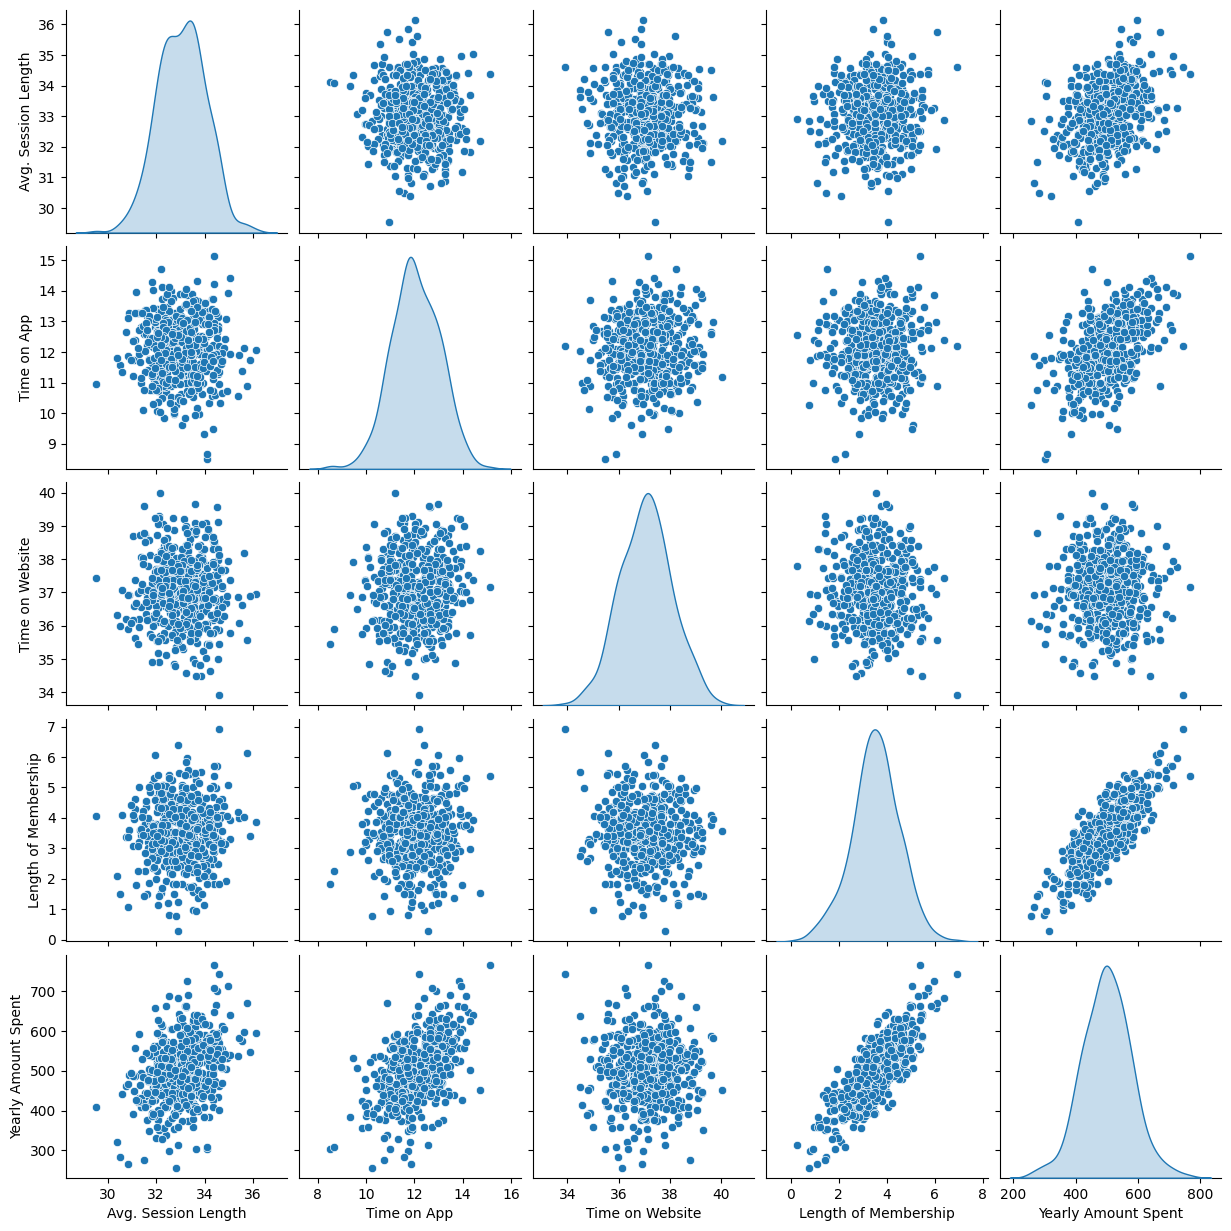

In [20]:
sns.pairplot(new_customers_df, diag_kind="kde")
plt.show()


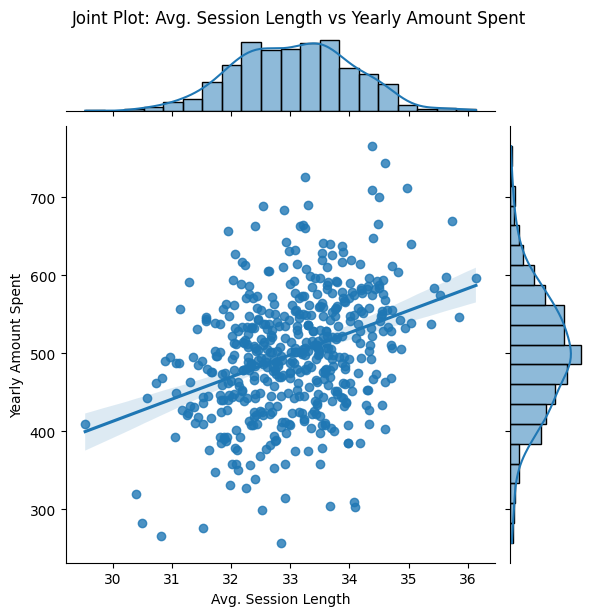

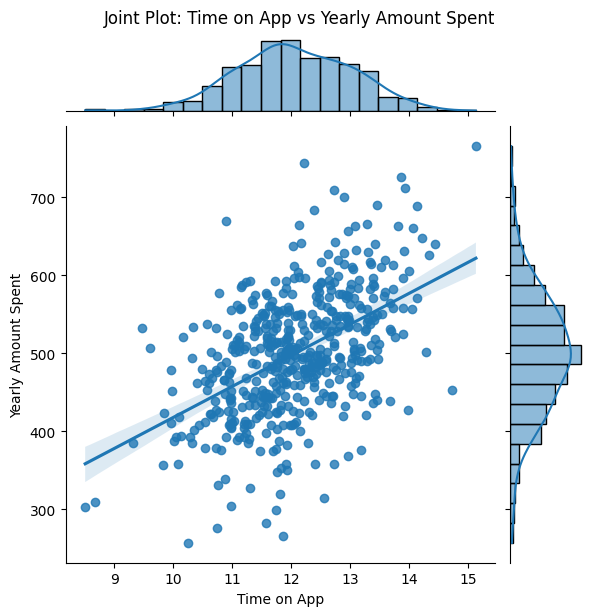

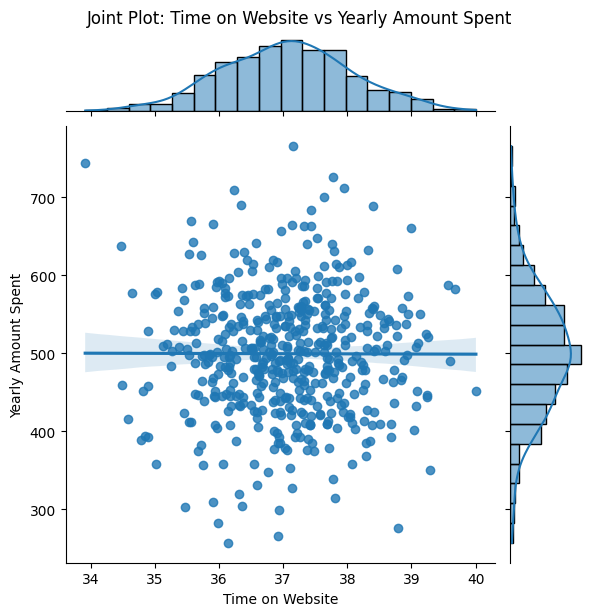

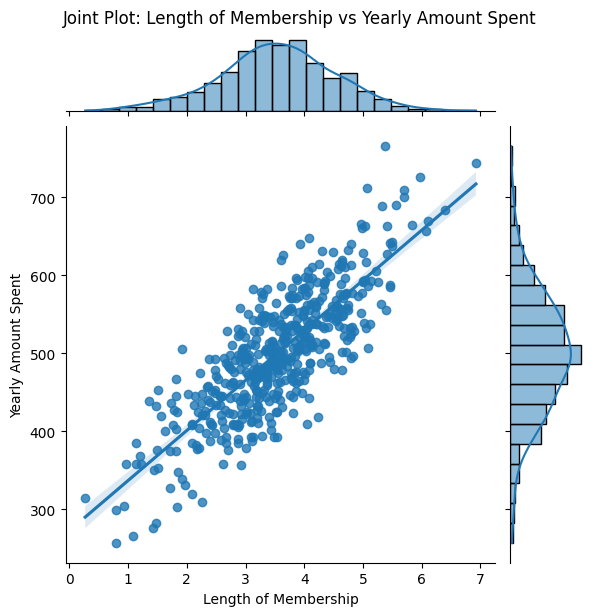

In [ ]:
for feature in new_customers_df.columns[:-1]:  # i don't know if we should exclude the target variable
    sns.jointplot(x=new_customers_df[feature], y=new_customers_df["Yearly Amount Spent"], kind="reg")
    plt.suptitle(f"Joint Plot: {feature} vs Yearly Amount Spent", y=1.02)
    plt.show()



Let's try to do the computation matrix

In [15]:
corr_matrix = new_customers_df.corr()

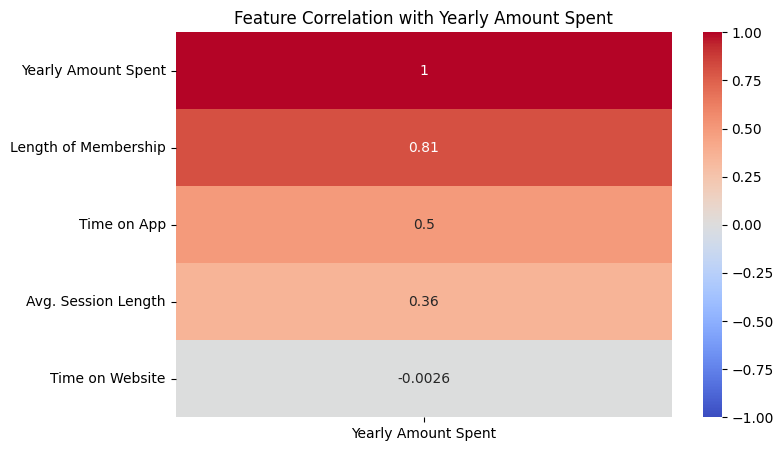

In [16]:
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix[['Yearly Amount Spent']].sort_values(by='Yearly Amount Spent', ascending=False), 
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation with Yearly Amount Spent")
plt.show()

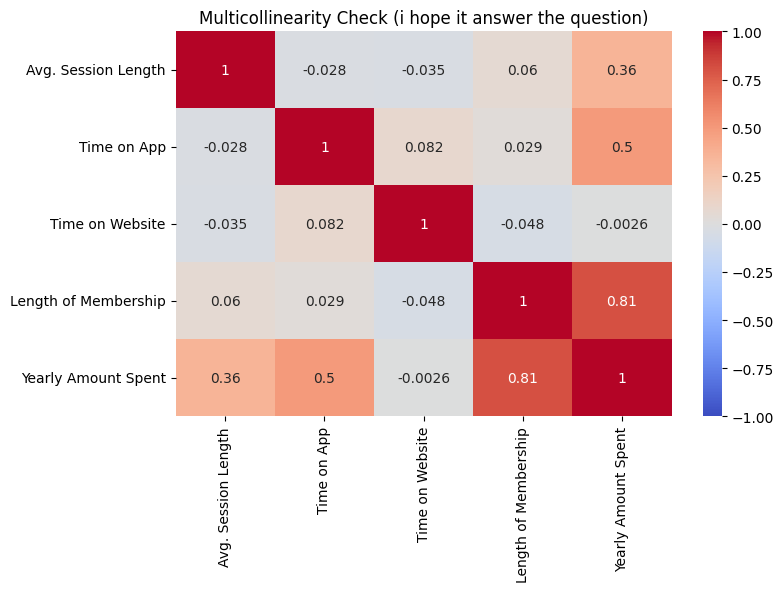

In [18]:
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Multicollinearity Check (i hope it answer the question)")
plt.show()

## Predictive model

Now that we have explored a bit the data we want to create a predictive model to understand if 
the company should focus more on their mobile app experience or on their website.

Or maybe there is some other apsect that is still more important and and the company should focus on it!!

Let's implement a simple linear regression model (choose the variable you reatin more appropriate and explain why you chose it) and a multivariate model that uses multiple variables. 

Then, based on your preliminary exploratoy data analysis and on the models' results draw your conclusion.

### UNIVARIATE MODEL 

we should prepare the target variable

In [56]:
y_v1 = new_customers_df["Yearly Amount Spent"]

In [57]:
X_simple_v1 = customers[['Length of Membership']]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_simple_v1, y_v1, test_size=0.25, random_state=5)


train part

In [59]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [60]:
y_pred = model.predict(X_test)

In [61]:
print(model.intercept_)
print(model.coef_[0])

269.65403592381665
65.14793731066334


let's plot the model

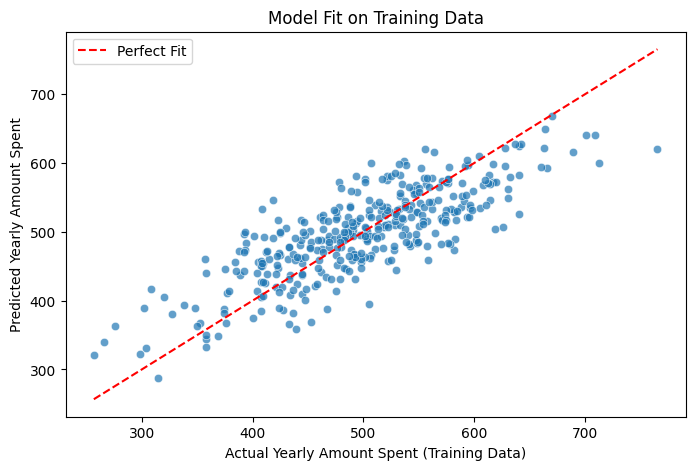

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train, y=model.predict(X_train), alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--r', label="Perfect Fit")  
plt.xlabel("Actual Yearly Amount Spent (Training Data)")
plt.ylabel("Predicted Yearly Amount Spent")
plt.title("Model Fit on Training Data")
plt.legend()
plt.show()

now, let's evaluate the model 

In [63]:
y_pred_test = model.predict(X_test)

In [64]:
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)


In [65]:
print(mse_test)

1744.646561976358


In [66]:
print(r2_test)

0.6889559142164579


There is still 31.1% of unexplained variance, indicating room for improvement (1-R2_test)

Maybe we should try to add more features to improve our regression..

## Multivariate Model

we should prepare the target variable

In [26]:
y = new_customers_df["Yearly Amount Spent"]


New features !!

In [27]:
X = new_customers_df[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]

### Training and test splits
Split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)


### Training of the model

In [31]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [32]:
y_pred = model.predict(X_test)

#### Print the coeficients of the model

In [ ]:
coefficients = dict(zip(X.columns, model.coef_))


In [35]:
coefficients


{'Avg. Session Length': np.float64(25.934335531530174),
 'Time on App': np.float64(38.485863854038065),
 'Time on Website': np.float64(0.49717599745361696),
 'Length of Membership': np.float64(61.7884472105322)}

In [36]:
print(model.intercept_)
print(model.coef_[0])

-1058.348437036516
25.934335531530174


### Make a plot to show how the model fit the training data.

Looking at the plot explain if the coefficients you found make sense

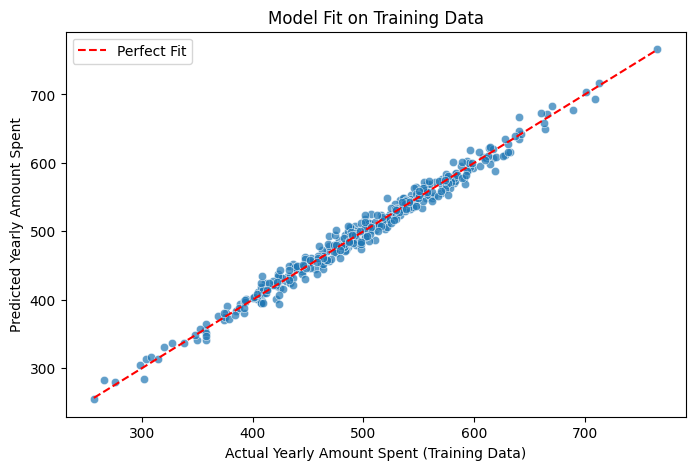

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train, y=model.predict(X_train), alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--r', label="Perfect Fit")
plt.xlabel("Actual Yearly Amount Spent (Training Data)")
plt.ylabel("Predicted Yearly Amount Spent")
plt.title("Model Fit on Training Data")
plt.legend()
plt.show()

### Evaluate the model on the test set

    - Make some plots you think maybe usefull to evaluate the predictions of our model and then evaluate it through some metrics.

In [51]:
plt.figure(figsize=(8, 5))
residuals = y_test - y_pred_test

<Figure size 800x500 with 0 Axes>

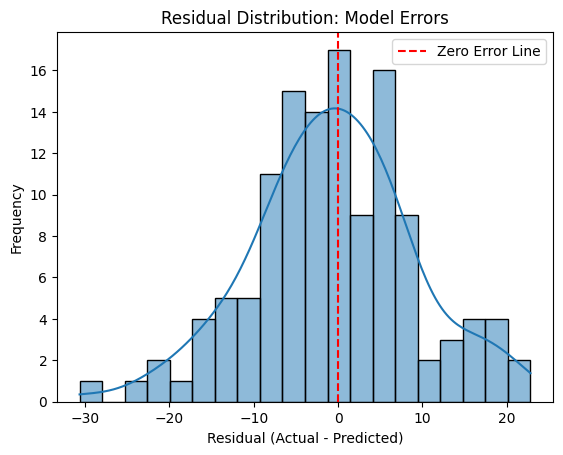

In [52]:
sns.histplot(residuals, bins=20, kde=True)
plt.axvline(x=0, color='red', linestyle='--', label="Zero Error Line")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution: Model Errors")
plt.legend()
plt.show()

We can observe that the model performs very well with low errors.
Most predictions are close to actual values, making the model reliable for business decisions..

#### Evalution Metrics

In [42]:
y_pred_test = model.predict(X_test)

In [49]:
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)


In [40]:
print(mse_test)

92.75754400896496


In [41]:
print(r2_test)

0.9834627333096558


#### Which model has better performance?

We can observe that the **2 model (multivariate) is far superior**, as its lower a lottt MSE. It means that means much smaller prediction errors.

Moreover, the r² is wayy higher (0.983 vs. 0.689). This imply that the second model captures variances way better than the first one (univariate)

There is no doubt. The second model is way better. The predictions are far more accurate 

**Describe how you interpret the coefficients of the model and based on that decide how the company shoud behave in order to try to improve their business increasing the `Yearly Amount Spent` per customer.**

We will consider the results (coefficients) that are issued from the multivariate analsis for 

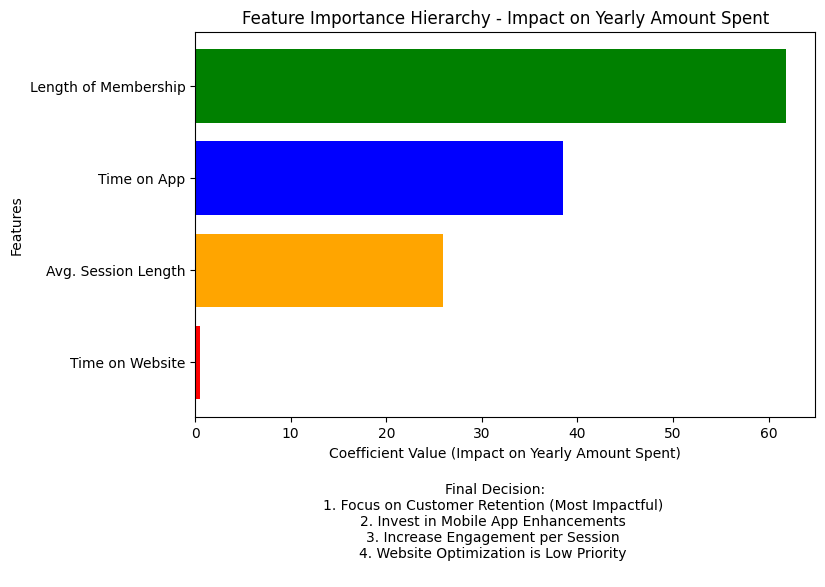

In [ ]:
coefficients = {
    "Length of Membership": 61.79,
    "Time on App": 38.49,
    "Avg. Session Length": 25.93,
    "Time on Website": 0.50
}

sorted_coefficients = dict(sorted(coefficients.items(), key=lambda item: item[1], reverse=True))

# Plot the hierarchy of feature importance
plt.figure(figsize=(8, 5))
plt.barh(list(sorted_coefficients.keys()), list(sorted_coefficients.values()), color=['green', 'blue', 'orange', 'red'])
plt.xlabel("Coefficient Value (Impact on Yearly Amount Spent)")
plt.ylabel("Features")
plt.title("Feature Importance Hierarchy - Impact on Yearly Amount Spent")
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Display final decision as text
final_decision = """
Final Decision:
1. Focus on Customer Retention (Most Impactful) 
2. Invest in Mobile App Enhancements 
3. Increase Engagement per Session 
4. Website Optimization is Low Priority 
"""

plt.figtext(0.5, -0.2, final_decision, wrap=True, horizontalalignment='center', fontsize=10)

# Show the plot
plt.show()
